<a href="https://colab.research.google.com/github/anandhuarjuna/NLP/blob/main/Span_and_non_spam_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0       0
1       0
2       0
3       0
4       1
       ..
1077    0
1078    0
1079    0
1080    0
1081    0
Name: Label, Length: 1082, dtype: int64

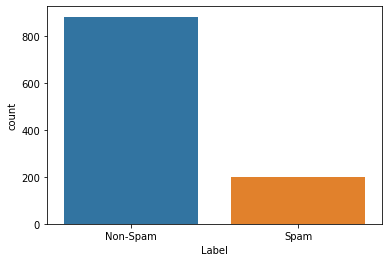

In [ ]:
import pandas as pd
import pandas as pd
df_train=pd.read_csv('/content/SMS_train.csv',encoding='ISO-8859-1')
df_test=pd.read_csv('/content/SMS_test.csv',encoding='ISO-8859-1')
df=pd.concat([df_train,df_test],ignore_index=True,axis=0)
df.isna().sum()
df['Label'].value_counts()
import seaborn as sns
sns.countplot(df['Label'])
df['Label']=df['Label'].map({'Non-Spam':0,'Spam':1})
df['Label']


In [ ]:
message=df.Message_body
message=message.str.replace('[^a-zA_Z0-9]+',' ')
message

<ipython-input-7-f26f88f86b06>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  message=message.str.replace('[^a-zA_Z0-9]+',' ')


0                                 ofl ts true to its name
1        he guy did some bitching but acted like i d b...
2        ity was in mood for that o any other suggesti...
3                       ill b going to esplanade fr home 
4        his is the 2nd time we have tried 2 contact u...
                              ...                        
1077    7 wonders in y 7th ou 6th r style 5th r smile ...
1078     ry to do something dear ou read something for...
1079     un ah hk mayb can if dun have anythin on hk h...
1080     when are in love 1 like listening songs 2 get...
1081        reat ave a safe trip ont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

In [ ]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
stem=SnowballStemmer('english')
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
message=message.apply(lambda x: [stem.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))

message

0                                  ofl ts true to it name
1       he guy did some bitch but act like i d be inte...
2            iti was in mood for that o ani other suggest
3                            ill b go to esplanad fr home
4       his is the 2nd time we have tri 2 contact u ha...
                              ...                        
1077    7 wonder in y 7th ou 6th r style 5th r smile 4...
1078         ry to do someth dear ou read someth for exam
1079    un ah hk mayb can if dun have anythin on hk ha...
1080    when are in love 1 like listen song 2 get stop...
1081           reat ave a safe trip ont panic surrend all
Name: Message_body, Length: 1082, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
train_vec=vect.fit_transform(message)
print(train_vec)


  (0, 1921)	0.4460555865654023
  (0, 1601)	0.2401158115470034
  (0, 2823)	0.1712344774958923
  (0, 2869)	0.46356413331742524
  (0, 2873)	0.4142415154895614
  (0, 2029)	0.5723371607734409
  (1, 1280)	0.1911785092441155
  (1, 1265)	0.13108046428479966
  (1, 2944)	0.21250016111525316
  (1, 1313)	0.25989697835359254
  (1, 485)	0.1252953687752707
  (1, 3029)	0.18300145069097826
  (1, 1957)	0.21002979003683986
  (1, 1091)	0.2407449682024429
  (1, 2611)	0.22096118348734223
  (1, 743)	0.22096118348734223
  (1, 1533)	0.12049586989024216
  (1, 1571)	0.25989697835359254
  (1, 646)	0.15064898889489678
  (1, 1721)	0.17415636663398773
  (1, 381)	0.28071242939071317
  (1, 742)	0.16689299306643296
  (1, 681)	0.2972345823768223
  (1, 2606)	0.18826665342339988
  (1, 971)	0.21794138417803277
  :	:
  (1080, 1731)	0.26618324335151816
  (1080, 3046)	0.23327756518881462
  (1080, 492)	0.26618324335151816
  (1080, 2615)	0.27549597255254404
  (1080, 1764)	0.20071823135401473
  (1080, 2669)	0.20071823135401473
 

In [ ]:
X=train_vec
y=df['Label'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=3)

SVC()
Predicting new sentence
not spam
*****************************
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       259
           1       1.00      0.50      0.67        66

    accuracy                           0.90       325
   macro avg       0.94      0.75      0.80       325
weighted avg       0.91      0.90      0.88       325

*****************************
MultinomialNB()
Predicting new sentence
not spam
*****************************
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       259
           1       1.00      0.38      0.55        66

    accuracy                           0.87       325
   macro avg       0.93      0.69      0.74       325
weighted avg       0.89      0.87      0.85       325

*****************************
RandomForestClassifier()
Predicting new sentence
not spam
*****************************
              precision    recall  f1-score   supp

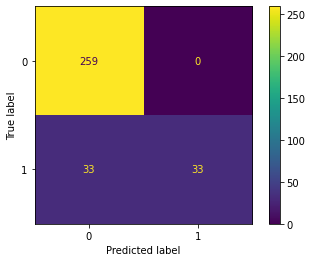

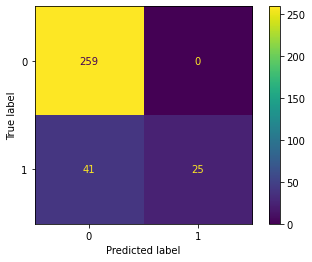

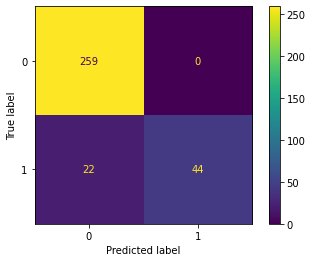

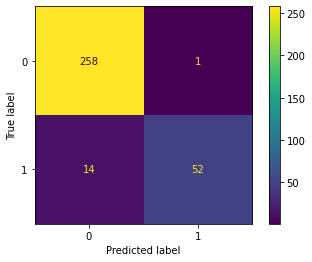

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
svc=SVC()
nb=MultinomialNB()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
lst=[svc,nb,rf,ab]
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
for i in lst:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  y_sent=i.predict(vect.transform(['Hi how are you']))
  print('Predicting new sentence')
  if y_sent==[0]:
    print('not spam')
  else:
    print('Spam')
  print('*****************************')
  print(classification_report(y_test,y_pred))
  print('*****************************')
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
train_vec.shape

(1082, 3164)